In [1]:
from pytorch_libraries.utility_dataset import *
from pytorch_libraries.model_AE import *

from IPython.display import clear_output

from pylab import *
%matplotlib inline
#%qtconsole #--style monokai

# 0. Load dataset and Model

In [2]:
trnset = np.fromfile("../data/MNIST/MNIST_train_data.dat").reshape(-1,785)

#model = torch.load('../data/model/MNIST_AEdnn.pt').cuda()
model = AEdnn_MNIST().cuda()

trnset  = tcDataset(trnset,shape=(-1,784))

batches = DataLoader(trnset, batch_size=100, shuffle=False)

# 1. Training

In [3]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
lossfunc  = loss_BCE

model.train()
# begin Training
for epoch in range(20):
    running_loss = 0.0
    for i, batch in enumerate(batches):
        
        # 1.get the inputs
        inputs = Variable(batch["data"]).cuda()
        labels = Variable(batch["label"]).cuda()
        # 2.zero the parameter gradients
        optimizer.zero_grad()
        # 3.forward + backward + optimize 
        recons, codes = model(inputs)
        loss = lossfunc(recons, inputs)
        
        loss.backward()
        optimizer.step()
        
        
        # TRAINING DESHBOARD #
        ##################################################################
        running_loss += loss.data[0]
        if i % 100 == 99:    # print every 100 mini-batches
            print('[{:5d}, {:5d}] loss: {:5.3f}'.
                  format(epoch+1, i+1, running_loss/100))
            clear_output(wait=True)
            running_loss = 0.0
        ##################################################################

[   20,   600] loss: 3802.770


# 2. Test Accuracy

In [10]:
model = model.cpu()

model.eval()
for batch in DataLoader(trnset,batch_size=len(trnset), shuffle=False):
    inputs  = Variable(batch["data"])
    labels  = Variable(batch["label"])
    recons, codes = model(inputs)
    
codes = codes.data.numpy()
recons = recons.data.numpy()

In [5]:
codes.tofile('../data/MNIST/MNIST_train_data_AE.dat')

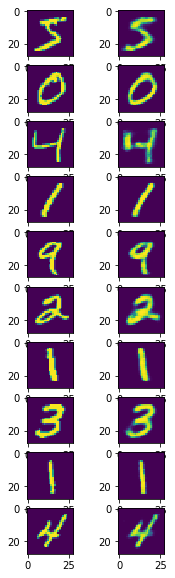

In [11]:
fig = plt.figure(figsize=(3,10))
nrow = 10
for row in range(nrow):
    plt.subplot(nrow,2,2*row+1)
    a = trnset[row]['data']
    a = a.reshape(28,28).T
    imshow(a)
    
    plt.subplot(nrow,2,2*row+2)
    a = recons[row]
    a = a.reshape(28,28).T
    imshow(a)

In [11]:
torch.save(model.cpu(),'../data/model/MNIST_AEdnn.pt') 

In [19]:
codes.mean(axis=0)

array([ 0.        ,  3.80151677,  3.39571643,  3.67262959,  3.94010901,
        3.24484611,  3.69064331,  2.80292702,  3.55240297,  3.29658771,
        0.        ,  3.86220002,  3.35335541,  3.87509203,  4.55116558,
        0.        ,  0.        ,  3.39449692,  0.        ,  3.3280673 ], dtype=float32)